###Exercise 6

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

Fun with Numpy Slicing and Broadcast assignment.

1) Creating an array

In [2]:
a = np.array([[1.,2.],[3.,4.],[5.,6.]])
print a

[[ 1.  2.]
 [ 3.  4.]
 [ 5.  6.]]


2)Getting Array shape

In [3]:
print a.shape
print a.shape[0]
print a.shape[1]

(3, 2)
3
2


3) Creating array of zeros

In [4]:
b = np.zeros((10,5))
print b
print b.shape

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
(10, 5)


4) Using for loop to write an array

In [5]:
c = np.zeros((10,5)) #Note the parenthesis. The argument is a tuple.
nrow, ncol = c.shape
for irow in range(nrow):
    for icol in range(ncol):
        c[irow,icol] = 20*irow + icol
        #you can do either c[irow][icol] or c[irow, icol]
print c

[[   0.    1.    2.    3.    4.]
 [  20.   21.   22.   23.   24.]
 [  40.   41.   42.   43.   44.]
 [  60.   61.   62.   63.   64.]
 [  80.   81.   82.   83.   84.]
 [ 100.  101.  102.  103.  104.]
 [ 120.  121.  122.  123.  124.]
 [ 140.  141.  142.  143.  144.]
 [ 160.  161.  162.  163.  164.]
 [ 180.  181.  182.  183.  184.]]


5) Access array.

In [6]:
#row 2
print c[2]
#row 2 column 3
print c[2][3]
print c[2,3] #either way

[ 40.  41.  42.  43.  44.]
43.0
43.0


6) Array Slicing

In [7]:
print c[1:4,2] #first index can be from [2,4) = 2,3 (not including the end)
         #second index has to be 2

[ 22.  42.  62.]


In [8]:
print c[1, 1:5] #first index 1, second index from [1,5) = 1,2,3,4

[ 21.  22.  23.  24.]


In [9]:
print c[1:3,2:5] #you can slice a rectangle from it too

[[ 22.  23.  24.]
 [ 42.  43.  44.]]


In [10]:
print c[1:,2] #row 1 and on, column 2

[  22.   42.   62.   82.  102.  122.  142.  162.  182.]


In [11]:
print c[:3,2] #row 0,1,2 and column 2

[  2.  22.  42.]


In [12]:
print c[:3,:] #row 0,1,2 and every column

[[  0.   1.   2.   3.   4.]
 [ 20.  21.  22.  23.  24.]
 [ 40.  41.  42.  43.  44.]]


7) The one we normally use

In [13]:
print c[:,1] #First index everything (:), Second index must be 1
             #this means getting column 1

[   1.   21.   41.   61.   81.  101.  121.  141.  161.  181.]


In [14]:
print c[2,:] #First index is 2, Second index can be anything
             #This means row number 2.

[ 40.  41.  42.  43.  44.]


8) Reference or copy? It's reference.

In [15]:
d = c[2,:]
print d
d[2] = 0
print d
print c

[ 40.  41.  42.  43.  44.]
[ 40.  41.   0.  43.  44.]
[[   0.    1.    2.    3.    4.]
 [  20.   21.   22.   23.   24.]
 [  40.   41.    0.   43.   44.]
 [  60.   61.   62.   63.   64.]
 [  80.   81.   82.   83.   84.]
 [ 100.  101.  102.  103.  104.]
 [ 120.  121.  122.  123.  124.]
 [ 140.  141.  142.  143.  144.]
 [ 160.  161.  162.  163.  164.]
 [ 180.  181.  182.  183.  184.]]


9) What if you want a copy?

In [16]:
c3 = c.copy()

In [17]:
c3[1,1] = 999
print c3
print c

[[   0.    1.    2.    3.    4.]
 [  20.  999.   22.   23.   24.]
 [  40.   41.    0.   43.   44.]
 [  60.   61.   62.   63.   64.]
 [  80.   81.   82.   83.   84.]
 [ 100.  101.  102.  103.  104.]
 [ 120.  121.  122.  123.  124.]
 [ 140.  141.  142.  143.  144.]
 [ 160.  161.  162.  163.  164.]
 [ 180.  181.  182.  183.  184.]]
[[   0.    1.    2.    3.    4.]
 [  20.   21.   22.   23.   24.]
 [  40.   41.    0.   43.   44.]
 [  60.   61.   62.   63.   64.]
 [  80.   81.   82.   83.   84.]
 [ 100.  101.  102.  103.  104.]
 [ 120.  121.  122.  123.  124.]
 [ 140.  141.  142.  143.  144.]
 [ 160.  161.  162.  163.  164.]
 [ 180.  181.  182.  183.  184.]]


10) Refrence is actually the right choice of implementation. It allows you to do this broadcast assignment.

In [18]:
c[7,:] = 1 #all row 7 or c becomes 1
print c

[[   0.    1.    2.    3.    4.]
 [  20.   21.   22.   23.   24.]
 [  40.   41.    0.   43.   44.]
 [  60.   61.   62.   63.   64.]
 [  80.   81.   82.   83.   84.]
 [ 100.  101.  102.  103.  104.]
 [ 120.  121.  122.  123.  124.]
 [   1.    1.    1.    1.    1.]
 [ 160.  161.  162.  163.  164.]
 [ 180.  181.  182.  183.  184.]]


In [19]:
#you can do this too
c[2,:] = c[3,:] + c[5,:]
print c

[[   0.    1.    2.    3.    4.]
 [  20.   21.   22.   23.   24.]
 [ 160.  162.  164.  166.  168.]
 [  60.   61.   62.   63.   64.]
 [  80.   81.   82.   83.   84.]
 [ 100.  101.  102.  103.  104.]
 [ 120.  121.  122.  123.  124.]
 [   1.    1.    1.    1.    1.]
 [ 160.  161.  162.  163.  164.]
 [ 180.  181.  182.  183.  184.]]


In [20]:
c[:,1] = c[:,1]*2 #column 1 all multiply by 2
print c

[[   0.    2.    2.    3.    4.]
 [  20.   42.   22.   23.   24.]
 [ 160.  324.  164.  166.  168.]
 [  60.  122.   62.   63.   64.]
 [  80.  162.   82.   83.   84.]
 [ 100.  202.  102.  103.  104.]
 [ 120.  242.  122.  123.  124.]
 [   1.    2.    1.    1.    1.]
 [ 160.  322.  162.  163.  164.]
 [ 180.  362.  182.  183.  184.]]


### Gaussian Elimination.

See the notes. That's your homework.

In [169]:
def forward(A_input, C_input):
    A = A_input.copy() + 0.0
    C = C_input.copy() + 0.0
    
    
    rows, cols = A.shape
    
    for col in xrange(cols):
        for row in xrange(col + 1, rows):
            mul = A[row, col]/A[col, col]
            A[row, :] = A[row, :] - (mul * A[col, :])
            C[row] = C[row] - (mul * C[col])
    return A, C

In [170]:
def backward(A_input, C_input):
    A = A_input.copy() + 0.0
    C = C_input.copy() + 0.0
    
    rows, cols = A.shape
    
    for col in range(1, cols)[::-1]:
        for row in range(col)[::-1]:
            mul = A[row, col]/A[col, col]
            A[row, :] = A[row, :] - (mul * A[col, :])
            C[row] = C[row] - (mul * C[col])            
    return A, C 

In [171]:
def solve(A_input, C_input):
    A = A_input.copy() + 0.0
    C = C_input.copy() + 0.0
    
    A, C = forward(A, C)
    A, C = backward(A, C)
    
    rows, cols = A.shape    
    
    for row in xrange(rows):
        C[row] = C[row]/A[row, row]
        
    return C

In [172]:
A = np.array([[1,1,1], [2,-1,1],[1,3,3]])
C = np.array([6,3,16])

solve(A, C)

array([ 1.,  2.,  3.])

In [173]:
A = np.array([[ 1.41085005, -0.7968228 ,  0.770725  , -2.27149203,  1.07679575,
        -0.05352268, -0.20491908,  0.13411747,  0.17953174,  0.43977633],
       [ 1.40423273, -0.071954  ,  0.38155755, -0.81991806, -1.3099021 ,
        -0.40901761, -0.40189885, -0.1484372 ,  1.65337417, -0.49878858],
       [ 0.19421637, -0.169156  ,  0.07725314,  0.80473126, -0.90361621,
        -0.30466395,  0.43814109,  2.49705232, -0.13883504, -0.82981086],
       [-1.64554814,  1.30049502,  1.36031487,  2.92410539,  0.84126799,
        -0.05740189,  0.10901268,  0.51533618,  0.63304519,  0.05131925],
       [ 0.80072211, -1.64632338,  3.13487573, -1.61300475, -0.28550655,
        -0.06176828,  1.01093614, -0.09354775,  0.21643107, -0.10452093],
       [ 1.32032988, -2.69806413,  2.84836784,  0.56810692,  1.63074993,
        -1.63443389, -0.31601889,  0.51580712,  0.94834078, -1.40032072],
       [ 0.83195219,  0.39176082, -1.33149509,  0.02739715,  0.87532344,
         0.60280857,  0.15735313, -1.18770059,  0.96211094, -1.09721431],
       [ 2.00426988,  0.4374144 ,  1.04625293, -0.0754942 ,  0.32592236,
         0.18206438, -0.46377942,  0.21559955,  0.00437785, -2.19755659],
       [-0.30648359, -0.30334965,  1.25100235,  0.22861532,  0.65970428,
         1.46210001, -1.18884318, -0.48068408, -0.06693367,  1.19192386],
       [ 0.67013854,  1.2410746 ,  0.71554813, -1.78164197, -0.53617138,
        -1.78167853,  0.46912022, -0.3755937 , -0.70714214,  2.52436448]])
C = np.array([  3.7583091 ,  -3.9865987 ,  10.45630641,  31.69111417,
         5.8933824 ,   1.53506365,  -4.98923164, -15.01994618,
        14.97486756,   3.95989358])

In [174]:
print solve(A, C)

[  1.00000001   1.99999998   2.99999998   4.00000003   4.99999997
   6.00000003   7.00000004   8.00000003   9.0000001   10.00000005]


### System of Non-Linear Equations.

Consider
$$x^2 + xy = 10$$
$$y + 3 xy^2 = 57$$

1) Write it in the form of
$$u(x,y) = 0$$
$$v(x,y) = 0$$

In [185]:
def u(x,y):
    return x**2 + x * y - 10

def v(x,y):
    return y + 3 * x * y**2 - 57


2) Let us visualize it by making 3d plot. Despite looking really cool it doesn't tell much.

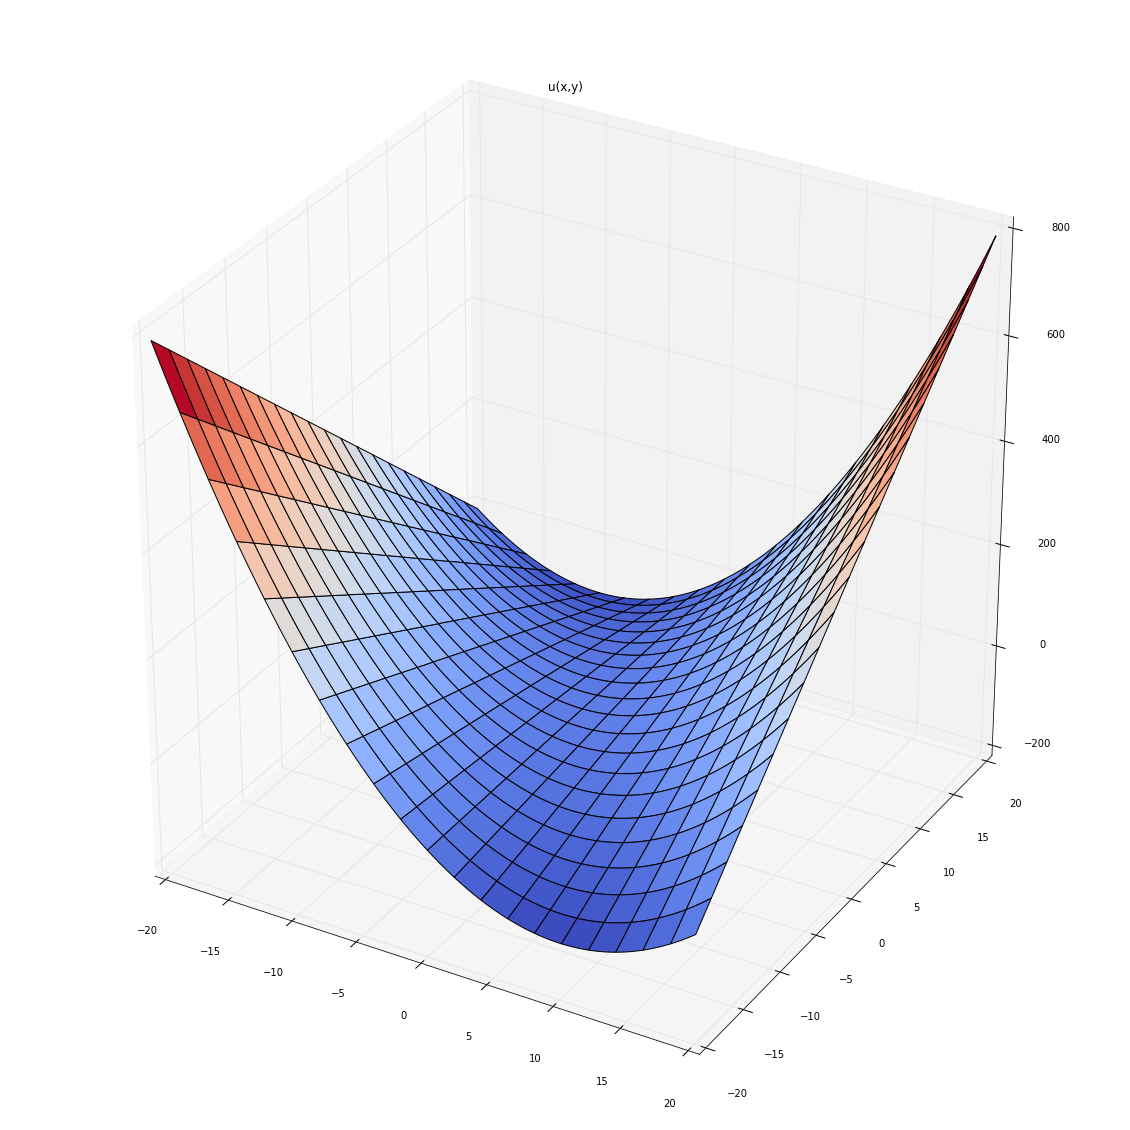

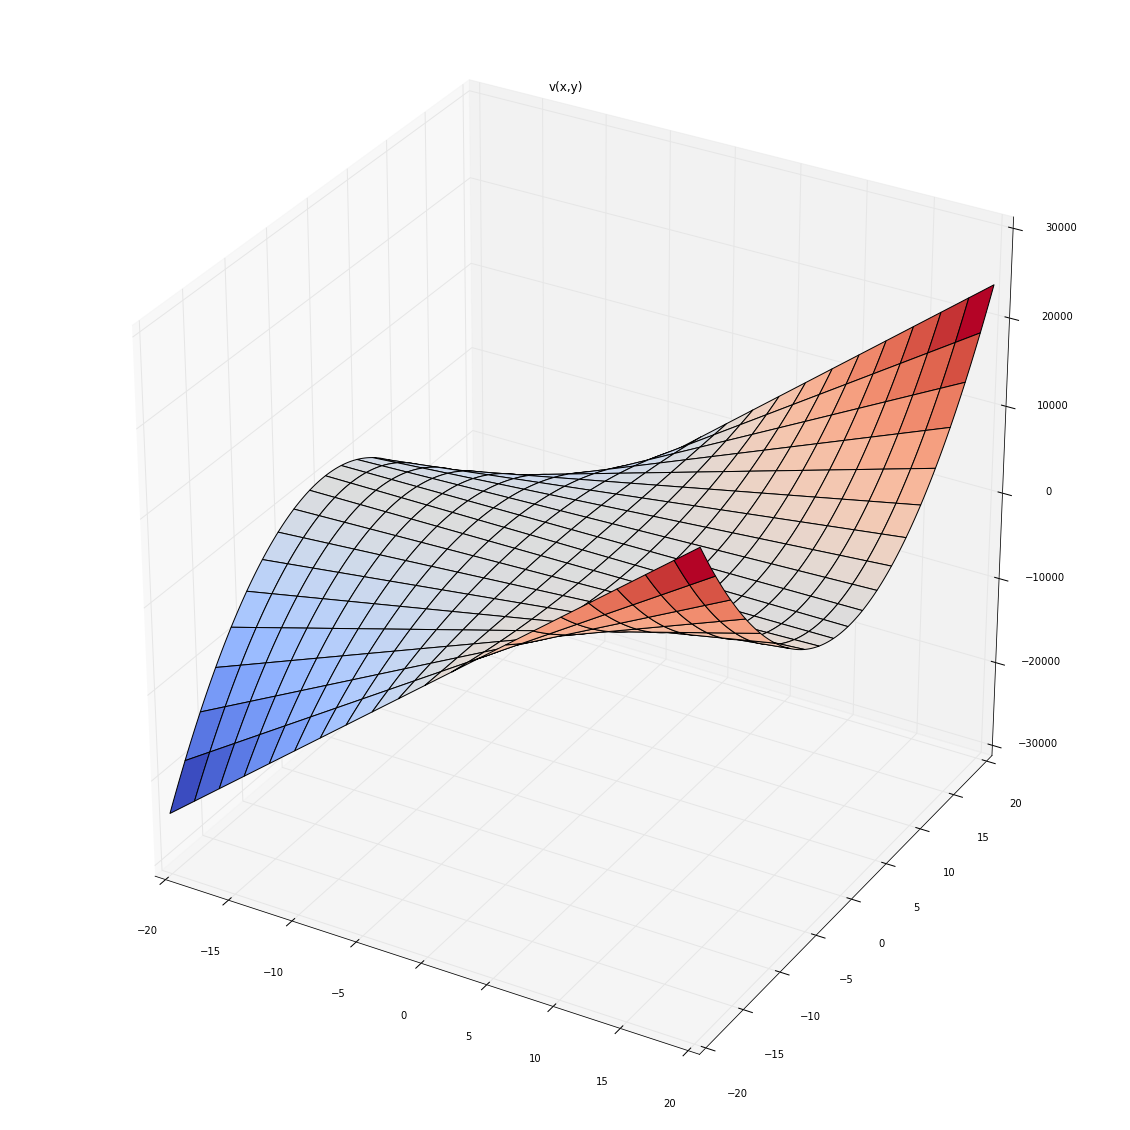

In [186]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#see matplotlib3d surface
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        vz[iy,ix] = v(xx,yy) ##<<<<<<And this too.   

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ucs = ax.plot_surface(xgrid, ygrid, uz, cmap=cm.coolwarm)
plt.title('u(x,y)')

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')        
ucs = ax.plot_surface(xgrid, ygrid, vz, cmap=cm.coolwarm)
plt.title('v(x,y)')

3) Contour plot.

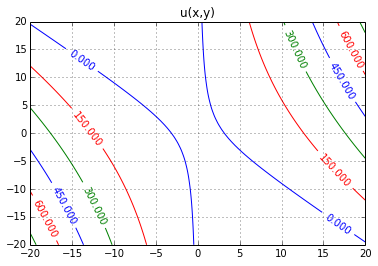

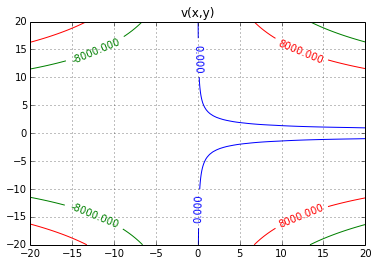

In [183]:
#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
nx = 100
ny = 100
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        vz[iy,ix] = v(xx,yy)
 

ucs = plt.contour(x, y, uz, colors=('b','r','g'))
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('u(x,y)')

plt.figure()
vcs = plt.contour(x, y, vz, colors=('b','r','g'))
plt.clabel(vcs, inline=1, fontsize=10,)
plt.title('v(x,y)')
plt.grid()

3) Which lines are we interested in?

4)Let's overlay them on top of each other.

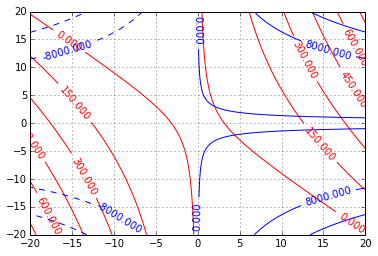

In [184]:
#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        vz[iy,ix] = v(xx,yy)


ucs = plt.contour(x, y, uz, colors=('r'))
plt.clabel(ucs, inline=1, fontsize=10)
vcs = plt.contour(x, y, vz, colors=('b'))
plt.clabel(vcs, inline=1, fontsize=10)
plt.grid()

5) Where (approximately) are the solutions to $u(x,y)=0$ and $v(x,y)=0$

In [251]:
def diff_wX(f, x, y, h = 1e-10):
    return (f(x + h, y) - f(x - h, y))/(2. * h)

def diff_wY(f, x, y, h = 1e-10):
    return (f(x, y + h) - f(x, y - h))/(2. * h)

In [276]:
def solve_nonLinear(u, v, x, y):
    
#     for i in xrange(100):
    while (u(x, y) != 0 and v(x, y) != 0):
        dUX = diff_wX(u, x, y)
        dUY = diff_wY(u, x, y)
        dVX = diff_wX(v, x, y)
        dVY = diff_wY(v, x, y)
        A = np.array([[dUX, dUY], [dVX, dVY]])
        C = np.array([-u(x, y) + dUX * x + dUY * y, -v(x, y) + dVX * x + dVY * y])

        x, y = solve(A, C)
    
    
    return x, y

In [277]:
solve_nonLinear(u, v, 2., 2.)

(2.0, 3.0)

###Newton's Method (>1D)

1) What matrix equation you need to solve to find the next guess ($x_{n+1}, y_{n+1}$)?

2)Where should you start your guess ($x_0, y_0$)?

3) Find ($x_1, y_1$)

4)Find ($x_2, y_2$)

5)Write a program to do what you just did and find  $(x_5, y_5)$? Plot to verify. (Just at plt.plot([x],[y])). You may use np.linalg.solve.

6) Find the other solution.

7) Does it guarantee to converge to the right answer?

8) Implement np.linalg.solve using gaussian elimination.